In [159]:
import pandas as pd
import requests 
import seaborn as sns 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [160]:

response = requests.get('https://api.themoviedb.org/3/movie/top_rated?language=en-US&page=1', headers=headers)



In [161]:
df = pd.DataFrame(response.json()['results'])[['id','title','overview','release_date','popularity','vote_average','vote_count']]


In [145]:
df.head()

,id,title,overview,release_date,popularity,vote_average,vote_count
0,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,110.264,8.7,18811
1,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,1994-09-23,94.764,8.7,24789
2,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,1974-12-20,59.190,8.6,11369
3,424,Schindler's List,The true story of how businessman Oskar Schind...,1993-12-15,59.009,8.6,14692
4,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",1995-10-20,32.417,8.6,4266


In [162]:
df = pd.DataFrame()
df

""


In [163]:
for i in range(1,429):
    response = requests.get('https://api.themoviedb.org/3/movie/top_rated?language=en-US&page={}'.format(i), headers=headers)
    temp_df = pd.DataFrame(response.json()['results'])[['id','title','overview','release_date','popularity','vote_average','vote_count']]
    df = pd.concat([df, temp_df], ignore_index=True)
    

In [139]:
df

,id,title,overview,release_date,popularity,vote_average,vote_count
0,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,110.264,8.7,18811
1,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,1994-09-23,94.764,8.7,24789
2,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,1974-12-20,59.190,8.6,11369
3,424,Schindler's List,The true story of how businessman Oskar Schind...,1993-12-15,59.009,8.6,14692
4,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",1995-10-20,32.417,8.6,4266
...,...,...,...,...,...,...,...
8555,345922,Fist Fight,"When one school teacher gets the other fired, ...",2017-02-16,15.425,6.1,1175
8556,339792,David Brent: Life on the Road,"A camera crew catches up with David Brent, the...",2016-08-19,7.259,6.1,335
8557,278154,Ice Age: Collision Course,"Set after the events of Continental Drift, Scr...",2016-06-23,40.876,6.1,4194
8558,77951,Walking with Dinosaurs,Walking with Dinosaurs 3D is a film depicting ...,2013-12-18,20.720,6.1,437


In [164]:
df.shape

(8560, 7)

In [136]:
df.to_csv('movies.csv')

In [137]:
null_values = df.isna()
print(null_values)

         id  title  overview  release_date  popularity  vote_average  \
0     False  False     False         False       False         False   
1     False  False     False         False       False         False   
2     False  False     False         False       False         False   
3     False  False     False         False       False         False   
4     False  False     False         False       False         False   
...     ...    ...       ...           ...         ...           ...   
8555  False  False     False         False       False         False   
8556  False  False     False         False       False         False   
8557  False  False     False         False       False         False   
8558  False  False     False         False       False         False   
8559  False  False     False         False       False         False   

      vote_count  
0          False  
1          False  
2          False  
3          False  
4          False  
...          ...  
85

In [138]:
null_count = df.isna().sum()
print(null_count)

id              0
title           0
overview        0
release_date    0
popularity      0
vote_average    0
vote_count      0
dtype: int64


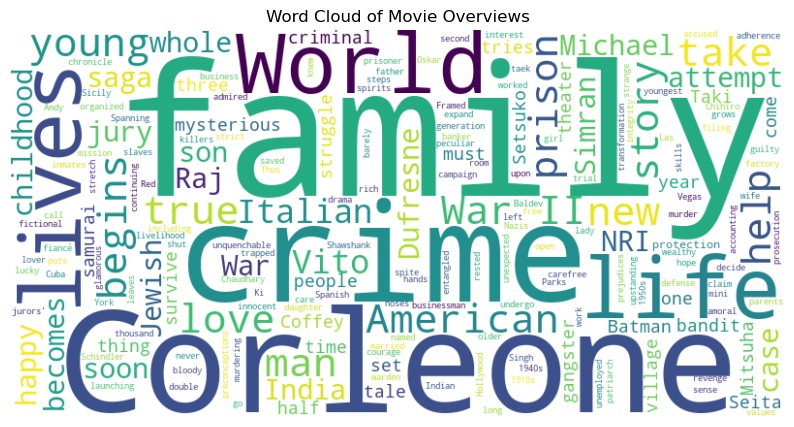

In [156]:
overview_text = ' '.join(df['overview'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(overview_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Overviews')
plt.show()


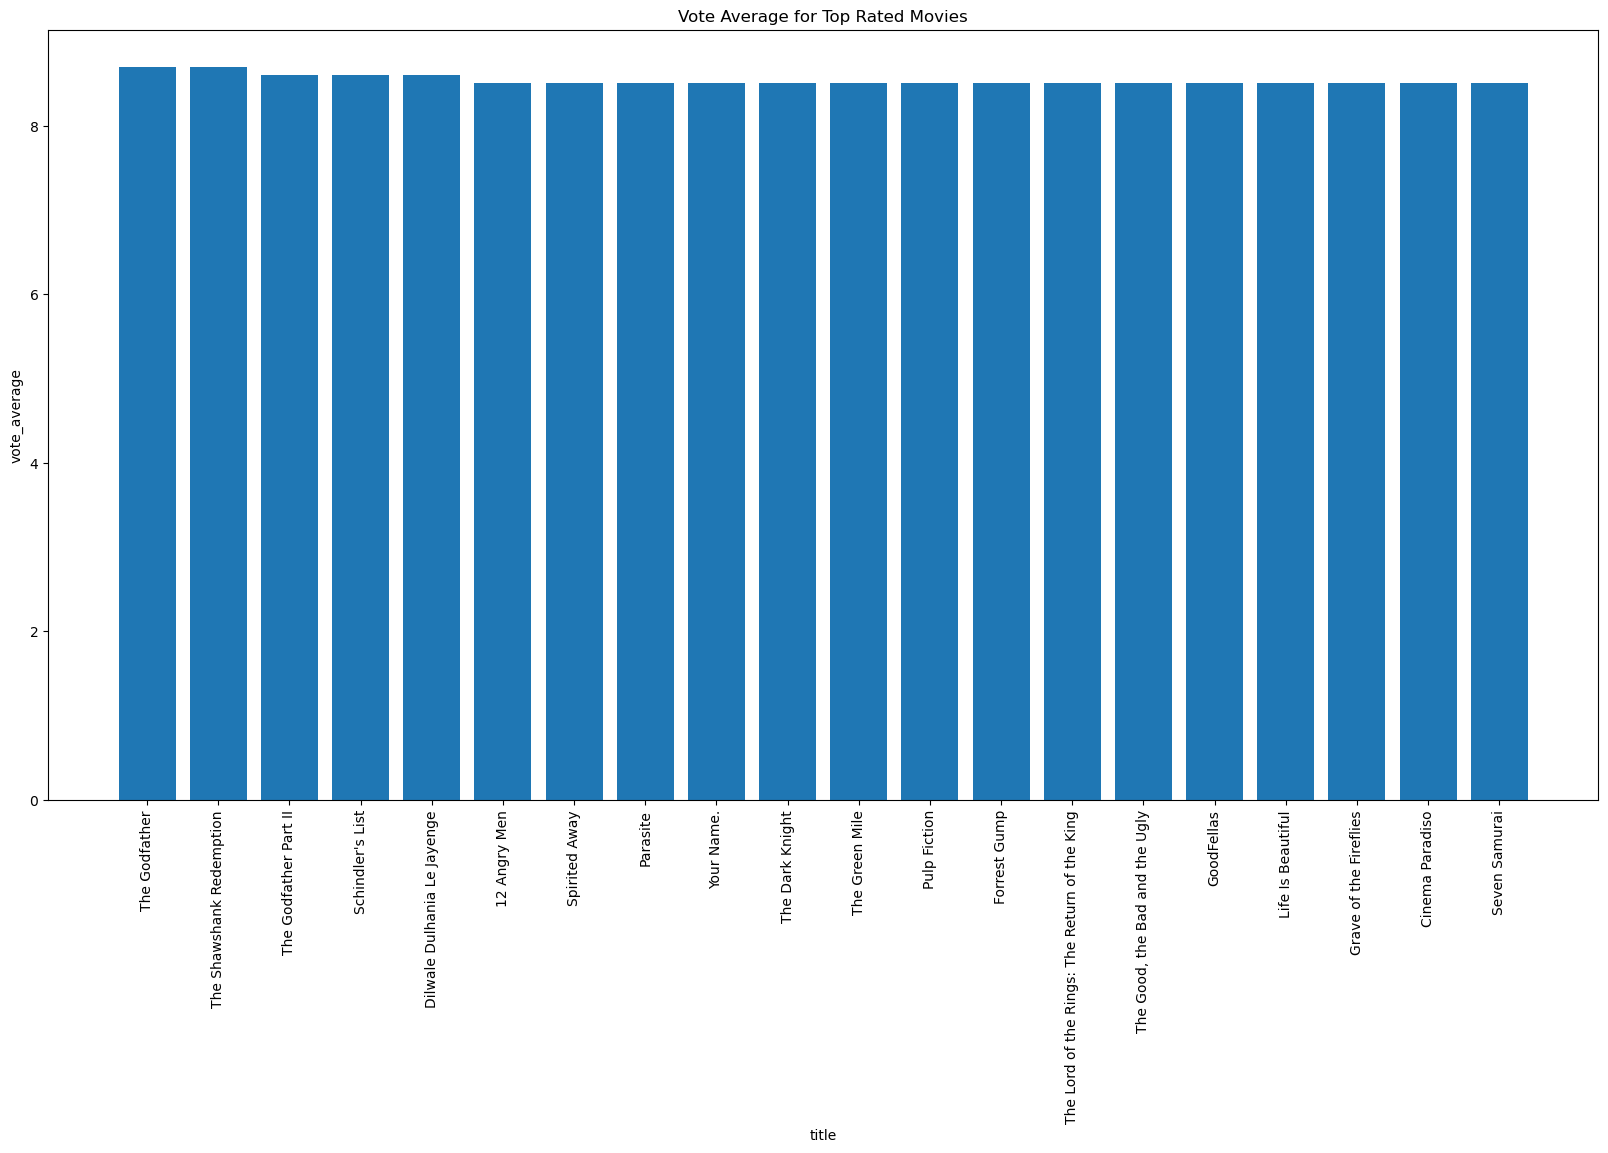

In [147]:
plt.figure(figsize=(20,10))
plt.bar(df['title'], df['vote_average'])
plt.xticks(rotation=90)
plt.xlabel('title')
plt.ylabel('vote_average')
plt.title('Vote Average for Top Rated Movies')
plt.show()

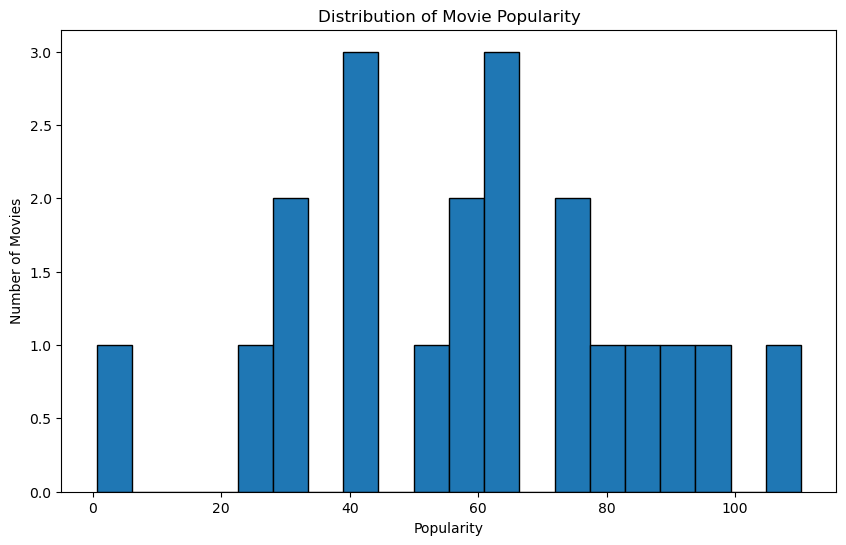

In [149]:
plt.figure(figsize=(10, 6))
plt.hist(df['popularity'], bins=20, edgecolor='k')
plt.xlabel('Popularity')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Popularity')
plt.show()


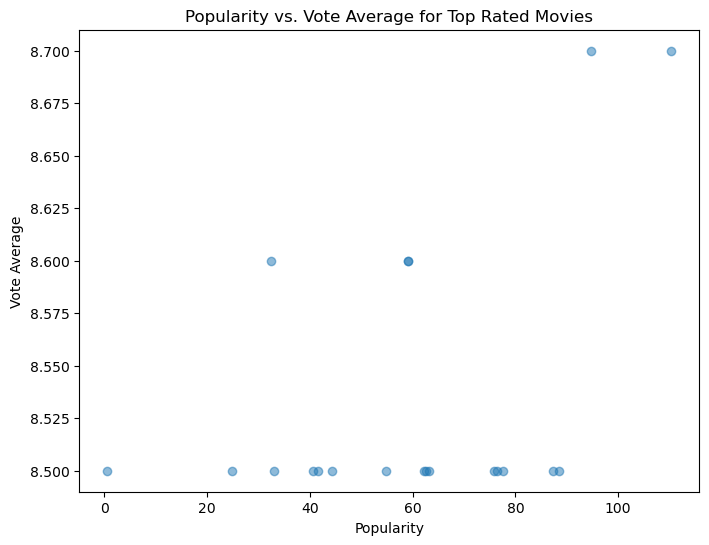

In [150]:
plt.figure(figsize=(8, 6))
plt.scatter(df['popularity'], df['vote_average'], alpha=0.5)
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.title('Popularity vs. Vote Average for Top Rated Movies')
plt.show()


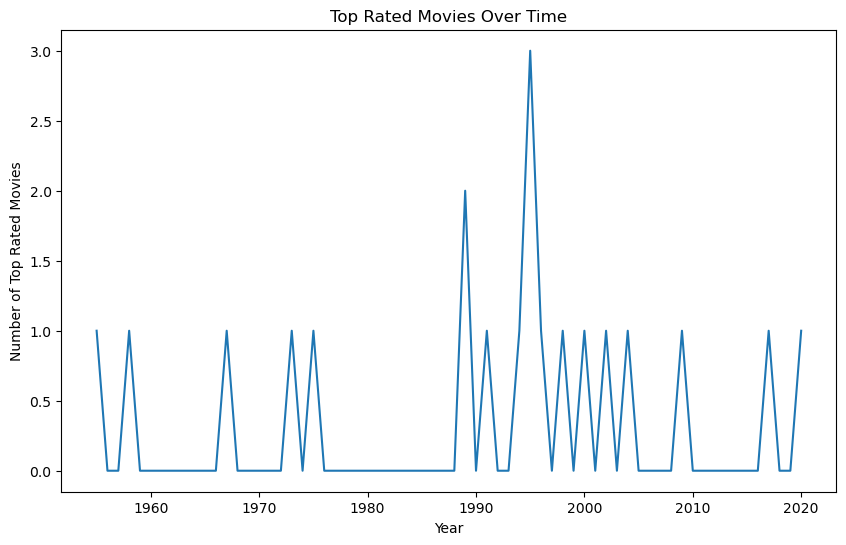

In [151]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.set_index('release_date', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df.resample('Y').size())
plt.xlabel('Year')
plt.ylabel('Number of Top Rated Movies')
plt.title('Top Rated Movies Over Time')
plt.show()

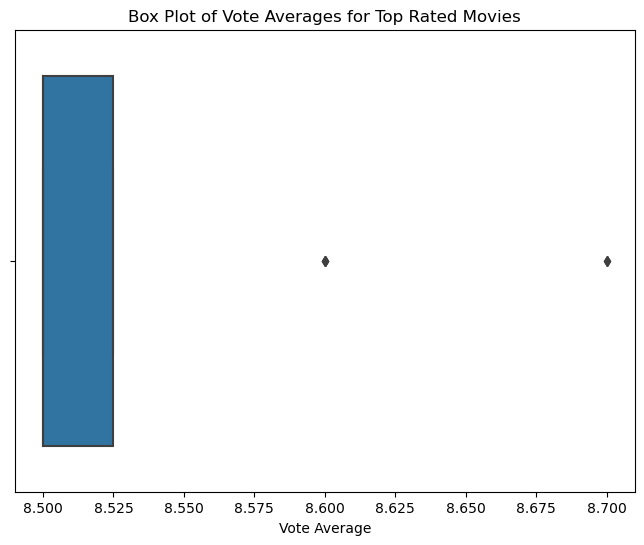

In [155]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='vote_average', data=df)
plt.xlabel('Vote Average')
plt.title('Box Plot of Vote Averages for Top Rated Movies')
plt.show()


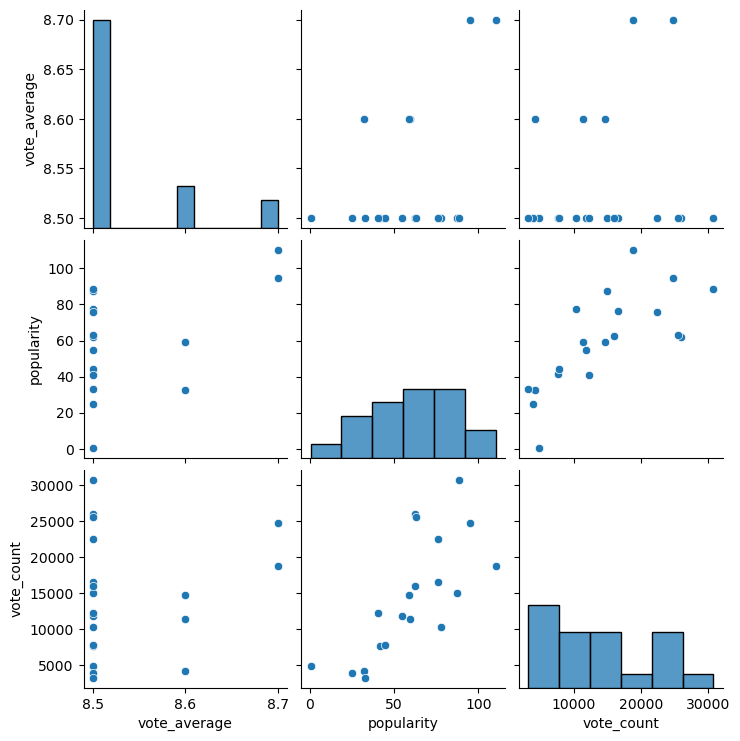

In [157]:
sns.pairplot(df[['vote_average', 'popularity', 'vote_count']])
plt.show()

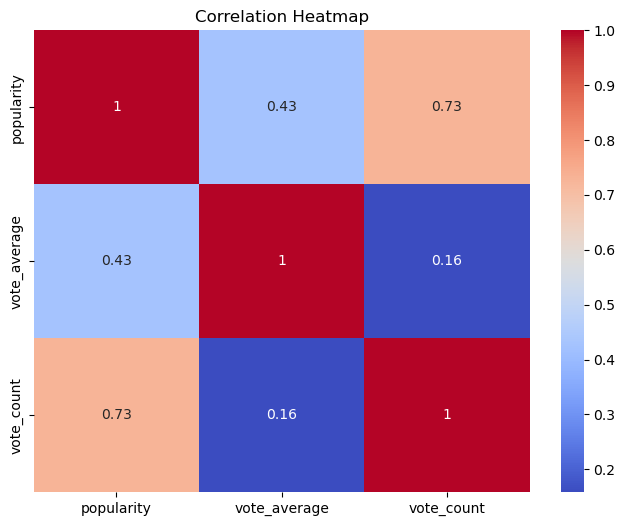

In [158]:
corr_matrix = df[['popularity', 'vote_average', 'vote_count']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()